In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()
tf.__version__

'2.3.1'

In [3]:
#loading data

In [4]:
styles = pd.read_csv('styles.csv',nrows=4000, error_bad_lines = False)
styles['image'] = styles.apply(lambda row: str(row['id']) + ".jpg", axis=1)

In [5]:
Apparel = styles[styles['masterCategory'].isin(['Apparel'])]
Accessories = styles[styles['masterCategory'].isin(['Accessories'])]
Footwear =  styles[styles['masterCategory'].isin(['Footwear'])]
Personal_Care =  styles[styles['masterCategory'].isin(['Personal Care'])]
Free_Items = styles[styles['masterCategory'].isin(['Free Items'])]
Sporting_Goods  =  styles[styles['masterCategory'].isin(['Sporting Goods'])]



Apparel, Accessories , Footwear, Personal_Care, Free_Items, Sporting_Goods= Apparel['id'].to_numpy(), Accessories['id'].to_numpy(), Footwear['id'].to_numpy(),Personal_Care['id'].to_numpy(), Free_Items['id'].to_numpy(), Sporting_Goods['id'].to_numpy()
Apparel.shape, Accessories.shape , Footwear.shape, Personal_Care.shape, Free_Items.shape, Sporting_Goods.shape

((1832,), (1069,), (856,), (231,), (12,), (0,))

In [19]:
image_path = 'C:/Users/NITESHKUMAR G/fashion data/images/'

IMG_SIZE = 224
LIMIT_IMAGES = 2000
NUM_OUTPUTS = 3

In [20]:
from tqdm import tqdm
import gc

In [27]:
from tensorflow.keras.preprocessing import image
def load_imgs(names):
    from tensorflow.keras.preprocessing import image
    imgs = []
    for i, image_name in enumerate(tqdm(names)):
        try:
            img = image.load_img(f'{image_path}{image_name}.jpg', target_size=(IMG_SIZE, IMG_SIZE))
            print(f'{image_path}{image_name}.jpg')
        except:
            img = None
            print("Error: Image not found!")
        if img is None:
            continue
        img = np.array(img)
        imgs.append(img)
    return np.array(imgs)

In [28]:
print("Loading Images...")
print("Apparel")
Apparel_images = load_imgs(Apparel[:LIMIT_IMAGES])
gc.collect()
print("Accessories")
Accessories_images = load_imgs(Accessories[:LIMIT_IMAGES])
gc.collect()
print("Footwear")
Footwear_images = load_imgs(Footwear[:LIMIT_IMAGES])
gc.collect()
print("Done")
Apparel_images.shape, Accessories_images.shape, Footwear_images.shape

  6%|████▉                                                                        | 116/1832 [00:00<00:01, 1151.60it/s]

Loading Images...
Apparel
C:/Users/NITESHKUMAR G/fashion data/images/15970.jpg
C:/Users/NITESHKUMAR G/fashion data/images/39386.jpg
C:/Users/NITESHKUMAR G/fashion data/images/21379.jpg
C:/Users/NITESHKUMAR G/fashion data/images/53759.jpg
C:/Users/NITESHKUMAR G/fashion data/images/1855.jpg
C:/Users/NITESHKUMAR G/fashion data/images/30805.jpg
C:/Users/NITESHKUMAR G/fashion data/images/26960.jpg
C:/Users/NITESHKUMAR G/fashion data/images/12369.jpg
C:/Users/NITESHKUMAR G/fashion data/images/42419.jpg
C:/Users/NITESHKUMAR G/fashion data/images/51832.jpg
C:/Users/NITESHKUMAR G/fashion data/images/13089.jpg
C:/Users/NITESHKUMAR G/fashion data/images/7990.jpg
C:/Users/NITESHKUMAR G/fashion data/images/37812.jpg
C:/Users/NITESHKUMAR G/fashion data/images/4729.jpg
C:/Users/NITESHKUMAR G/fashion data/images/56825.jpg
C:/Users/NITESHKUMAR G/fashion data/images/20099.jpg
C:/Users/NITESHKUMAR G/fashion data/images/3954.jpg
C:/Users/NITESHKUMAR G/fashion data/images/28690.jpg
C:/Users/NITESHKUMAR G/f

 20%|███████████████▋                                                             | 374/1832 [00:00<00:01, 1209.28it/s]


C:/Users/NITESHKUMAR G/fashion data/images/46411.jpg
C:/Users/NITESHKUMAR G/fashion data/images/34031.jpg
C:/Users/NITESHKUMAR G/fashion data/images/50574.jpg
C:/Users/NITESHKUMAR G/fashion data/images/31543.jpg
C:/Users/NITESHKUMAR G/fashion data/images/13613.jpg
C:/Users/NITESHKUMAR G/fashion data/images/27426.jpg
C:/Users/NITESHKUMAR G/fashion data/images/2244.jpg
C:/Users/NITESHKUMAR G/fashion data/images/33214.jpg
C:/Users/NITESHKUMAR G/fashion data/images/11144.jpg
C:/Users/NITESHKUMAR G/fashion data/images/25371.jpg
C:/Users/NITESHKUMAR G/fashion data/images/58719.jpg
C:/Users/NITESHKUMAR G/fashion data/images/6280.jpg
C:/Users/NITESHKUMAR G/fashion data/images/7352.jpg
C:/Users/NITESHKUMAR G/fashion data/images/2620.jpg
C:/Users/NITESHKUMAR G/fashion data/images/43507.jpg
C:/Users/NITESHKUMAR G/fashion data/images/28836.jpg
C:/Users/NITESHKUMAR G/fashion data/images/31127.jpg
C:/Users/NITESHKUMAR G/fashion data/images/11520.jpg
C:/Users/NITESHKUMAR G/fashion data/images/40382.

 35%|██████████████████████████▋                                                  | 636/1832 [00:00<00:00, 1247.88it/s]


C:/Users/NITESHKUMAR G/fashion data/images/17249.jpg
C:/Users/NITESHKUMAR G/fashion data/images/29546.jpg
C:/Users/NITESHKUMAR G/fashion data/images/9656.jpg
C:/Users/NITESHKUMAR G/fashion data/images/18201.jpg
C:/Users/NITESHKUMAR G/fashion data/images/4975.jpg
C:/Users/NITESHKUMAR G/fashion data/images/38606.jpg
C:/Users/NITESHKUMAR G/fashion data/images/59631.jpg
C:/Users/NITESHKUMAR G/fashion data/images/10850.jpg
C:/Users/NITESHKUMAR G/fashion data/images/26956.jpg
C:/Users/NITESHKUMAR G/fashion data/images/51038.jpg
C:/Users/NITESHKUMAR G/fashion data/images/30833.jpg
C:/Users/NITESHKUMAR G/fashion data/images/27884.jpg
C:/Users/NITESHKUMAR G/fashion data/images/3708.jpg
C:/Users/NITESHKUMAR G/fashion data/images/10408.jpg
C:/Users/NITESHKUMAR G/fashion data/images/1863.jpg
C:/Users/NITESHKUMAR G/fashion data/images/39182.jpg
C:/Users/NITESHKUMAR G/fashion data/images/41098.jpg
C:/Users/NITESHKUMAR G/fashion data/images/56813.jpg
C:/Users/NITESHKUMAR G/fashion data/images/59067.

 47%|████████████████████████████████████▍                                        | 868/1832 [00:00<00:00, 1173.96it/s]


C:/Users/NITESHKUMAR G/fashion data/images/31142.jpg
C:/Users/NITESHKUMAR G/fashion data/images/19728.jpg
C:/Users/NITESHKUMAR G/fashion data/images/27027.jpg
C:/Users/NITESHKUMAR G/fashion data/images/28853.jpg
C:/Users/NITESHKUMAR G/fashion data/images/50949.jpg
C:/Users/NITESHKUMAR G/fashion data/images/46010.jpg
C:/Users/NITESHKUMAR G/fashion data/images/34430.jpg
C:/Users/NITESHKUMAR G/fashion data/images/14037.jpg
C:/Users/NITESHKUMAR G/fashion data/images/20202.jpg
C:/Users/NITESHKUMAR G/fashion data/images/57350.jpg
C:/Users/NITESHKUMAR G/fashion data/images/10497.jpg
C:/Users/NITESHKUMAR G/fashion data/images/25770.jpg
C:/Users/NITESHKUMAR G/fashion data/images/11545.jpg
C:/Users/NITESHKUMAR G/fashion data/images/56282.jpg
C:/Users/NITESHKUMAR G/fashion data/images/20030.jpg
C:/Users/NITESHKUMAR G/fashion data/images/52410.jpg
C:/Users/NITESHKUMAR G/fashion data/images/4780.jpg
C:/Users/NITESHKUMAR G/fashion data/images/57162.jpg
C:/Users/NITESHKUMAR G/fashion data/images/410

 61%|██████████████████████████████████████████████▌                             | 1123/1832 [00:00<00:00, 1223.64it/s]


C:/Users/NITESHKUMAR G/fashion data/images/28057.jpg
C:/Users/NITESHKUMAR G/fashion data/images/30894.jpg
C:/Users/NITESHKUMAR G/fashion data/images/34408.jpg
C:/Users/NITESHKUMAR G/fashion data/images/7901.jpg
C:/Users/NITESHKUMAR G/fashion data/images/19522.jpg
C:/Users/NITESHKUMAR G/fashion data/images/48380.jpg
C:/Users/NITESHKUMAR G/fashion data/images/8949.jpg
C:/Users/NITESHKUMAR G/fashion data/images/20008.jpg
C:/Users/NITESHKUMAR G/fashion data/images/57966.jpg
C:/Users/NITESHKUMAR G/fashion data/images/52428.jpg
C:/Users/NITESHKUMAR G/fashion data/images/39125.jpg
C:/Users/NITESHKUMAR G/fashion data/images/37279.jpg
C:/Users/NITESHKUMAR G/fashion data/images/15129.jpg
C:/Users/NITESHKUMAR G/fashion data/images/45659.jpg
C:/Users/NITESHKUMAR G/fashion data/images/15915.jpg
C:/Users/NITESHKUMAR G/fashion data/images/11589.jpg
C:/Users/NITESHKUMAR G/fashion data/images/26139.jpg
C:/Users/NITESHKUMAR G/fashion data/images/51857.jpg
C:/Users/NITESHKUMAR G/fashion data/images/2689

 75%|█████████████████████████████████████████████████████████▎                  | 1381/1832 [00:01<00:00, 1253.62it/s]


C:/Users/NITESHKUMAR G/fashion data/images/37613.jpg
C:/Users/NITESHKUMAR G/fashion data/images/10031.jpg
C:/Users/NITESHKUMAR G/fashion data/images/24204.jpg
C:/Users/NITESHKUMAR G/fashion data/images/4928.jpg
C:/Users/NITESHKUMAR G/fashion data/images/41693.jpg
C:/Users/NITESHKUMAR G/fashion data/images/12766.jpg
C:/Users/NITESHKUMAR G/fashion data/images/27481.jpg
C:/Users/NITESHKUMAR G/fashion data/images/51401.jpg
C:/Users/NITESHKUMAR G/fashion data/images/7791.jpg
C:/Users/NITESHKUMAR G/fashion data/images/34096.jpg
C:/Users/NITESHKUMAR G/fashion data/images/45657.jpg
C:/Users/NITESHKUMAR G/fashion data/images/15127.jpg
C:/Users/NITESHKUMAR G/fashion data/images/11587.jpg
C:/Users/NITESHKUMAR G/fashion data/images/56240.jpg
C:/Users/NITESHKUMAR G/fashion data/images/57392.jpg
C:/Users/NITESHKUMAR G/fashion data/images/10455.jpg
C:/Users/NITESHKUMAR G/fashion data/images/18638.jpg
C:/Users/NITESHKUMAR G/fashion data/images/28891.jpg
C:/Users/NITESHKUMAR G/fashion data/images/2687

 83%|██████████████████████████████████████████████████████████████▋             | 1512/1832 [00:01<00:00, 1267.32it/s]


C:/Users/NITESHKUMAR G/fashion data/images/6082.jpg
C:/Users/NITESHKUMAR G/fashion data/images/13849.jpg
C:/Users/NITESHKUMAR G/fashion data/images/52445.jpg
C:/Users/NITESHKUMAR G/fashion data/images/57137.jpg
C:/Users/NITESHKUMAR G/fashion data/images/59891.jpg
C:/Users/NITESHKUMAR G/fashion data/images/11722.jpg
C:/Users/NITESHKUMAR G/fashion data/images/14096.jpg
C:/Users/NITESHKUMAR G/fashion data/images/53751.jpg
C:/Users/NITESHKUMAR G/fashion data/images/45634.jpg
C:/Users/NITESHKUMAR G/fashion data/images/15144.jpg
C:/Users/NITESHKUMAR G/fashion data/images/10436.jpg
C:/Users/NITESHKUMAR G/fashion data/images/24603.jpg
C:/Users/NITESHKUMAR G/fashion data/images/56223.jpg
C:/Users/NITESHKUMAR G/fashion data/images/32766.jpg
C:/Users/NITESHKUMAR G/fashion data/images/42411.jpg
C:/Users/NITESHKUMAR G/fashion data/images/12361.jpg
C:/Users/NITESHKUMAR G/fashion data/images/19789.jpg
C:/Users/NITESHKUMAR G/fashion data/images/26154.jpg
C:/Users/NITESHKUMAR G/fashion data/images/545

100%|████████████████████████████████████████████████████████████████████████████| 1832/1832 [00:01<00:00, 1248.40it/s]


C:/Users/NITESHKUMAR G/fashion data/images/39380.jpg
C:/Users/NITESHKUMAR G/fashion data/images/10438.jpg
C:/Users/NITESHKUMAR G/fashion data/images/27088.jpg
C:/Users/NITESHKUMAR G/fashion data/images/19787.jpg
C:/Users/NITESHKUMAR G/fashion data/images/3738.jpg
C:/Users/NITESHKUMAR G/fashion data/images/30803.jpg
C:/Users/NITESHKUMAR G/fashion data/images/26966.jpg
C:/Users/NITESHKUMAR G/fashion data/images/51008.jpg
C:/Users/NITESHKUMAR G/fashion data/images/7996.jpg
C:/Users/NITESHKUMAR G/fashion data/images/26368.jpg
C:/Users/NITESHKUMAR G/fashion data/images/29320.jpg
C:/Users/NITESHKUMAR G/fashion data/images/40946.jpg
C:/Users/NITESHKUMAR G/fashion data/images/33488.jpg
C:/Users/NITESHKUMAR G/fashion data/images/20259.jpg
C:/Users/NITESHKUMAR G/fashion data/images/15982.jpg
C:/Users/NITESHKUMAR G/fashion data/images/28808.jpg
C:/Users/NITESHKUMAR G/fashion data/images/43539.jpg
C:/Users/NITESHKUMAR G/fashion data/images/13249.jpg
C:/Users/NITESHKUMAR G/fashion data/images/1977


 13%|██████████▎                                                                  | 144/1069 [00:00<00:00, 1429.59it/s]

Accessories
C:/Users/NITESHKUMAR G/fashion data/images/59263.jpg
C:/Users/NITESHKUMAR G/fashion data/images/29114.jpg
C:/Users/NITESHKUMAR G/fashion data/images/30039.jpg
C:/Users/NITESHKUMAR G/fashion data/images/48123.jpg
C:/Users/NITESHKUMAR G/fashion data/images/47957.jpg
C:/Users/NITESHKUMAR G/fashion data/images/29928.jpg
C:/Users/NITESHKUMAR G/fashion data/images/47359.jpg
C:/Users/NITESHKUMAR G/fashion data/images/17429.jpg
C:/Users/NITESHKUMAR G/fashion data/images/6842.jpg
C:/Users/NITESHKUMAR G/fashion data/images/48311.jpg
C:/Users/NITESHKUMAR G/fashion data/images/21977.jpg
C:/Users/NITESHKUMAR G/fashion data/images/58183.jpg
C:/Users/NITESHKUMAR G/fashion data/images/29742.jpg
C:/Users/NITESHKUMAR G/fashion data/images/51658.jpg
C:/Users/NITESHKUMAR G/fashion data/images/18839.jpg
C:/Users/NITESHKUMAR G/fashion data/images/23278.jpg
C:/Users/NITESHKUMAR G/fashion data/images/38402.jpg
C:/Users/NITESHKUMAR G/fashion data/images/44984.jpg
C:/Users/NITESHKUMAR G/fashion data

 38%|█████████████████████████████▌                                               | 410/1069 [00:00<00:00, 1379.47it/s]


C:/Users/NITESHKUMAR G/fashion data/images/23282.jpg
C:/Users/NITESHKUMAR G/fashion data/images/19911.jpg
C:/Users/NITESHKUMAR G/fashion data/images/16959.jpg
C:/Users/NITESHKUMAR G/fashion data/images/25175.jpg
C:/Users/NITESHKUMAR G/fashion data/images/25949.jpg
C:/Users/NITESHKUMAR G/fashion data/images/5265.jpg
C:/Users/NITESHKUMAR G/fashion data/images/14632.jpg
C:/Users/NITESHKUMAR G/fashion data/images/24295.jpg
C:/Users/NITESHKUMAR G/fashion data/images/37682.jpg
C:/Users/NITESHKUMAR G/fashion data/images/46427.jpg
C:/Users/NITESHKUMAR G/fashion data/images/43155.jpg
C:/Users/NITESHKUMAR G/fashion data/images/23276.jpg
C:/Users/NITESHKUMAR G/fashion data/images/18837.jpg
C:/Users/NITESHKUMAR G/fashion data/images/35313.jpg
C:/Users/NITESHKUMAR G/fashion data/images/51656.jpg
C:/Users/NITESHKUMAR G/fashion data/images/30661.jpg
C:/Users/NITESHKUMAR G/fashion data/images/43393.jpg
C:/Users/NITESHKUMAR G/fashion data/images/25181.jpg
C:/Users/NITESHKUMAR G/fashion data/images/405

 64%|█████████████████████████████████████████████████▎                           | 685/1069 [00:00<00:00, 1375.86it/s]


C:/Users/NITESHKUMAR G/fashion data/images/17225.jpg
C:/Users/NITESHKUMAR G/fashion data/images/46487.jpg
C:/Users/NITESHKUMAR G/fashion data/images/45202.jpg
C:/Users/NITESHKUMAR G/fashion data/images/53367.jpg
C:/Users/NITESHKUMAR G/fashion data/images/32350.jpg
C:/Users/NITESHKUMAR G/fashion data/images/45030.jpg
C:/Users/NITESHKUMAR G/fashion data/images/21575.jpg
C:/Users/NITESHKUMAR G/fashion data/images/37410.jpg
C:/Users/NITESHKUMAR G/fashion data/images/32162.jpg
C:/Users/NITESHKUMAR G/fashion data/images/40542.jpg
C:/Users/NITESHKUMAR G/fashion data/images/38458.jpg
C:/Users/NITESHKUMAR G/fashion data/images/27682.jpg
C:/Users/NITESHKUMAR G/fashion data/images/9408.jpg
C:/Users/NITESHKUMAR G/fashion data/images/37074.jpg
C:/Users/NITESHKUMAR G/fashion data/images/37848.jpg
C:/Users/NITESHKUMAR G/fashion data/images/49299.jpg
C:/Users/NITESHKUMAR G/fashion data/images/26334.jpg
C:/Users/NITESHKUMAR G/fashion data/images/51266.jpg
C:/Users/NITESHKUMAR G/fashion data/images/473

 89%|████████████████████████████████████████████████████████████████████▌        | 952/1069 [00:00<00:00, 1355.12it/s]

C:/Users/NITESHKUMAR G/fashion data/images/35118.jpg
C:/Users/NITESHKUMAR G/fashion data/images/56678.jpg
C:/Users/NITESHKUMAR G/fashion data/images/38435.jpg
C:/Users/NITESHKUMAR G/fashion data/images/48742.jpg
C:/Users/NITESHKUMAR G/fashion data/images/18032.jpg
C:/Users/NITESHKUMAR G/fashion data/images/49690.jpg
C:/Users/NITESHKUMAR G/fashion data/images/38051.jpg
C:/Users/NITESHKUMAR G/fashion data/images/21940.jpg
C:/Users/NITESHKUMAR G/fashion data/images/48326.jpg
C:/Users/NITESHKUMAR G/fashion data/images/48114.jpg
C:/Users/NITESHKUMAR G/fashion data/images/48928.jpg
C:/Users/NITESHKUMAR G/fashion data/images/59254.jpg
C:/Users/NITESHKUMAR G/fashion data/images/15947.jpg
C:/Users/NITESHKUMAR G/fashion data/images/48789.jpg
C:/Users/NITESHKUMAR G/fashion data/images/23284.jpg
C:/Users/NITESHKUMAR G/fashion data/images/19917.jpg
C:/Users/NITESHKUMAR G/fashion data/images/5263.jpg
C:/Users/NITESHKUMAR G/fashion data/images/20401.jpg
C:/Users/NITESHKUMAR G/fashion data/images/2517

100%|████████████████████████████████████████████████████████████████████████████| 1069/1069 [00:00<00:00, 1313.45it/s]



C:/Users/NITESHKUMAR G/fashion data/images/3397.jpg
C:/Users/NITESHKUMAR G/fashion data/images/43162.jpg
C:/Users/NITESHKUMAR G/fashion data/images/7737.jpg
C:/Users/NITESHKUMAR G/fashion data/images/20602.jpg
C:/Users/NITESHKUMAR G/fashion data/images/52222.jpg
C:/Users/NITESHKUMAR G/fashion data/images/36767.jpg
C:/Users/NITESHKUMAR G/fashion data/images/45295.jpg
C:/Users/NITESHKUMAR G/fashion data/images/56682.jpg
C:/Users/NITESHKUMAR G/fashion data/images/14605.jpg
C:/Users/NITESHKUMAR G/fashion data/images/5252.jpg
C:/Users/NITESHKUMAR G/fashion data/images/25142.jpg
C:/Users/NITESHKUMAR G/fashion data/images/51695.jpg
C:/Users/NITESHKUMAR G/fashion data/images/19926.jpg
C:/Users/NITESHKUMAR G/fashion data/images/17080.jpg
C:/Users/NITESHKUMAR G/fashion data/images/20054.jpg
C:/Users/NITESHKUMAR G/fashion data/images/33443.jpg
C:/Users/NITESHKUMAR G/fashion data/images/43734.jpg
C:/Users/NITESHKUMAR G/fashion data/images/8129.jpg
C:/Users/NITESHKUMAR G/fashion data/images/47394.

 11%|████████▉                                                                       | 95/856 [00:00<00:00, 943.11it/s]

Footwear
C:/Users/NITESHKUMAR G/fashion data/images/9204.jpg
C:/Users/NITESHKUMAR G/fashion data/images/18653.jpg
C:/Users/NITESHKUMAR G/fashion data/images/46885.jpg
C:/Users/NITESHKUMAR G/fashion data/images/12967.jpg
C:/Users/NITESHKUMAR G/fashion data/images/9036.jpg
C:/Users/NITESHKUMAR G/fashion data/images/39988.jpg
C:/Users/NITESHKUMAR G/fashion data/images/59051.jpg
C:/Users/NITESHKUMAR G/fashion data/images/2886.jpg
C:/Users/NITESHKUMAR G/fashion data/images/3168.jpg
C:/Users/NITESHKUMAR G/fashion data/images/10268.jpg
C:/Users/NITESHKUMAR G/fashion data/images/59435.jpg
C:/Users/NITESHKUMAR G/fashion data/images/22198.jpg
C:/Users/NITESHKUMAR G/fashion data/images/29570.jpg
C:/Users/NITESHKUMAR G/fashion data/images/6628.jpg
C:/Users/NITESHKUMAR G/fashion data/images/26538.jpg
C:/Users/NITESHKUMAR G/fashion data/images/49495.jpg
C:/Users/NITESHKUMAR G/fashion data/images/54118.jpg
C:/Users/NITESHKUMAR G/fashion data/images/2872.jpg
C:/Users/NITESHKUMAR G/fashion data/images/

 39%|██████████████████████████████▌                                               | 335/856 [00:00<00:00, 1051.92it/s]


C:/Users/NITESHKUMAR G/fashion data/images/11516.jpg
C:/Users/NITESHKUMAR G/fashion data/images/44714.jpg
C:/Users/NITESHKUMAR G/fashion data/images/49837.jpg
C:/Users/NITESHKUMAR G/fashion data/images/16733.jpg
C:/Users/NITESHKUMAR G/fashion data/images/7364.jpg
C:/Users/NITESHKUMAR G/fashion data/images/47191.jpg
C:/Users/NITESHKUMAR G/fashion data/images/27074.jpg
C:/Users/NITESHKUMAR G/fashion data/images/2616.jpg
C:/Users/NITESHKUMAR G/fashion data/images/35783.jpg
C:/Users/NITESHKUMAR G/fashion data/images/22734.jpg
C:/Users/NITESHKUMAR G/fashion data/images/34651.jpg
C:/Users/NITESHKUMAR G/fashion data/images/13073.jpg
C:/Users/NITESHKUMAR G/fashion data/images/5601.jpg
C:/Users/NITESHKUMAR G/fashion data/images/39972.jpg
C:/Users/NITESHKUMAR G/fashion data/images/15384.jpg
C:/Users/NITESHKUMAR G/fashion data/images/41868.jpg
C:/Users/NITESHKUMAR G/fashion data/images/46615.jpg
C:/Users/NITESHKUMAR G/fashion data/images/16165.jpg
C:/Users/NITESHKUMAR G/fashion data/images/30695

 65%|██████████████████████████████████████████████████▋                           | 556/856 [00:00<00:00, 1071.96it/s]

C:/Users/NITESHKUMAR G/fashion data/images/6818.jpg
C:/Users/NITESHKUMAR G/fashion data/images/30251.jpg
C:/Users/NITESHKUMAR G/fashion data/images/8982.jpg
C:/Users/NITESHKUMAR G/fashion data/images/54526.jpg
C:/Users/NITESHKUMAR G/fashion data/images/35511.jpg
C:/Users/NITESHKUMAR G/fashion data/images/37246.jpg
C:/Users/NITESHKUMAR G/fashion data/images/40314.jpg
C:/Users/NITESHKUMAR G/fashion data/images/2817.jpg
C:/Users/NITESHKUMAR G/fashion data/images/33847.jpg
C:/Users/NITESHKUMAR G/fashion data/images/11925.jpg
C:/Users/NITESHKUMAR G/fashion data/images/41669.jpg
C:/Users/NITESHKUMAR G/fashion data/images/2219.jpg
C:/Users/NITESHKUMAR G/fashion data/images/34850.jpg
C:/Users/NITESHKUMAR G/fashion data/images/22109.jpg
C:/Users/NITESHKUMAR G/fashion data/images/49060.jpg
C:/Users/NITESHKUMAR G/fashion data/images/31946.jpg
C:/Users/NITESHKUMAR G/fashion data/images/8175.jpg
C:/Users/NITESHKUMAR G/fashion data/images/13018.jpg
C:/Users/NITESHKUMAR G/fashion data/images/54519.jp

100%|██████████████████████████████████████████████████████████████████████████████| 856/856 [00:00<00:00, 1159.85it/s]

C:/Users/NITESHKUMAR G/fashion data/images/16994.jpg
C:/Users/NITESHKUMAR G/fashion data/images/20892.jpg
C:/Users/NITESHKUMAR G/fashion data/images/9001.jpg
C:/Users/NITESHKUMAR G/fashion data/images/29123.jpg
C:/Users/NITESHKUMAR G/fashion data/images/30693.jpg
C:/Users/NITESHKUMAR G/fashion data/images/50776.jpg
C:/Users/NITESHKUMAR G/fashion data/images/46613.jpg
C:/Users/NITESHKUMAR G/fashion data/images/16163.jpg
C:/Users/NITESHKUMAR G/fashion data/images/41436.jpg
C:/Users/NITESHKUMAR G/fashion data/images/10294.jpg
C:/Users/NITESHKUMAR G/fashion data/images/4183.jpg
C:/Users/NITESHKUMAR G/fashion data/images/11948.jpg
C:/Users/NITESHKUMAR G/fashion data/images/22958.jpg
C:/Users/NITESHKUMAR G/fashion data/images/49469.jpg
C:/Users/NITESHKUMAR G/fashion data/images/22164.jpg
C:/Users/NITESHKUMAR G/fashion data/images/44712.jpg
C:/Users/NITESHKUMAR G/fashion data/images/57305.jpg
C:/Users/NITESHKUMAR G/fashion data/images/11510.jpg
C:/Users/NITESHKUMAR G/fashion data/images/2610.

Done


((1832, 224, 224, 3), (1069, 224, 224, 3), (856, 224, 224, 3))

In [29]:
#Viewing example Image..:

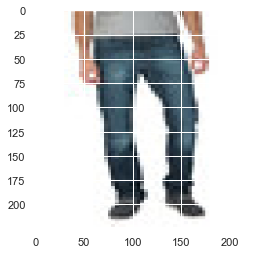

In [30]:
plt.imshow(Apparel_images[1])

In [31]:
#Setting up training and validation generators:

In [33]:
from keras.preprocessing.image import ImageDataGenerator

#image generator object from keras. reference : Keras Docs
image_generator = ImageDataGenerator(
    validation_split=0.2
)

#create a flow of images for training the model.
training_generator = image_generator.flow_from_dataframe(
    dataframe=styles,
    directory= "C:/Users/NITESHKUMAR G/fashion data/images/",
    x_col="image",
    y_col="masterCategory",
    target_size=(80,60),
    batch_size=256,
    subset="training"

)

#create a flow of images for validating(testing) the trained model.
validation_generator = image_generator.flow_from_dataframe(
    dataframe=styles,
    directory="C:/Users/NITESHKUMAR G/fashion data/images/",
    x_col="image",
    y_col="masterCategory",
    target_size=(80,60),
    batch_size=256,
    subset="validation"
)

Found 3200 validated image filenames belonging to 5 classes.
Found 800 validated image filenames belonging to 5 classes.


In [34]:
#Compiling Convolutional Neural Network

In [35]:
from keras import layers,models
model1 = Sequential()
#model.add(Flatten(input_shape=(28, 28)))
model1.add(layers.Conv2D(32, (4,4), strides = (2,2), activation = 'relu' , input_shape = (80,60,3)))
model1.add(Flatten())
model1.add(Dense(units=128, activation='relu'))
model1.add(Dense(units=5, activation='softmax'))

model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 39, 29, 32)        1568      
_________________________________________________________________
flatten (Flatten)            (None, 36192)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4632704   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 4,634,917
Trainable params: 4,634,917
Non-trainable params: 0
_________________________________________________________________


In [36]:
#Training (CNN) Model:

In [37]:
history = model1.fit(training_generator, epochs=10, validation_data=validation_generator, steps_per_epoch=10, verbose=1)

Epoch 1/10
10/10 [==============================] - 4s 355ms/step - loss: 1762.0466 - accuracy: 0.3314 - val_loss: 795.1270 - val_accuracy: 0.2637
Epoch 2/10
10/10 [==============================] - 2s 245ms/step - loss: 230.8671 - accuracy: 0.5436 - val_loss: 43.1796 - val_accuracy: 0.6888
Epoch 3/10
10/10 [==============================] - 2s 214ms/step - loss: 16.6760 - accuracy: 0.7447 - val_loss: 1.6300 - val_accuracy: 0.8462
Epoch 4/10
10/10 [==============================] - 2s 212ms/step - loss: 1.5628 - accuracy: 0.8257 - val_loss: 1.1147 - val_accuracy: 0.8363
Epoch 5/10
10/10 [==============================] - 2s 243ms/step - loss: 0.7061 - accuracy: 0.8647 - val_loss: 0.6420 - val_accuracy: 0.8712
Epoch 6/10
10/10 [==============================] - 2s 213ms/step - loss: 0.3809 - accuracy: 0.8964 - val_loss: 0.5738 - val_accuracy: 0.8888
Epoch 7/10
10/10 [==============================] - 2s 222ms/step - loss: 0.2675 - accuracy: 0.9124 - val_loss: 0.5234 - val_accuracy: 0.89

In [38]:
#You can see the metrics about model below .

In [39]:
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

,loss,accuracy,val_loss,val_accuracy,epoch
0,1762.046631,0.331414,795.126953,0.263750,0
1,230.867111,0.543586,43.179565,0.688750,1
2,16.676001,0.744655,1.629996,0.846250,2
3,1.562779,0.825658,1.114679,0.836250,3
4,0.706150,0.864720,0.642016,0.871250,4
5,0.380869,0.896382,0.573786,0.888750,5
6,0.267516,0.912418,0.523435,0.897500,6
7,0.226565,0.935547,0.492044,0.906250,7
8,0.170326,0.947368,0.471434,0.917500,8
9,0.163600,0.955469,0.512037,0.911250,9


In [51]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and Loss')
fig.show()

# Small differences between accuracy and val_accuracy with accuracy >95% therefore the model looks relatively good.